In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats



# Coin flipping problem
Let's assume that only two outcomes are possible—heads or tails—and let's also assume
that a coin toss does not affect other tosses, that is, we are assuming coin tosses are
independent of each other. We will further assume all coin tosses come from the same
distribution. Thus the random variable coin toss is an example of an iid variable. I hope you
agree these are very reasonable assumptions to make for our problem. Given these
assumptions a good candidate for the likelihood is the binomial distribution:

$P(y|\theta, N)$ = $\frac{N} {y!(N-y)!}  \theta^y (1-\theta)^{N-y} $



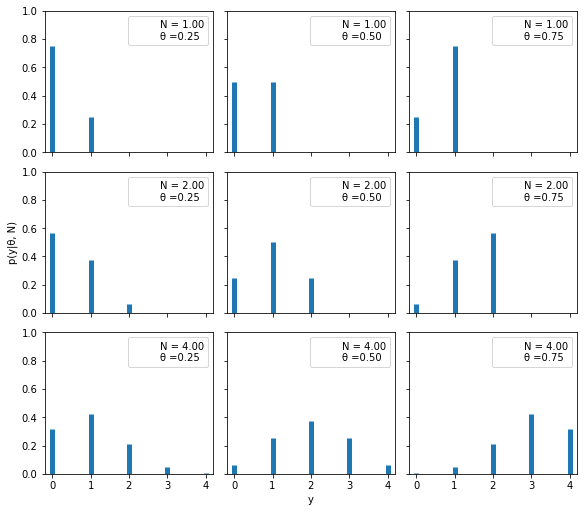

In [ ]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success
x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True,
sharey=True,
figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
    for j in range(len(p_params)):
      n = n_params[i]
      p = p_params[j]
      y = stats.binom(n=n, p=p).pmf(x)
      ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
      ax[i,j].set_ylim(0, 1)
      ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ ={:3.2f}".format(n,p), alpha=0)
      ax[i,j].legend()
      ax[2,1].set_xlabel('y')
      ax[1,0].set_ylabel('p(y|θ, N)')
      ax[0,0].set_xticks(x)

# computing and plotting the posterior

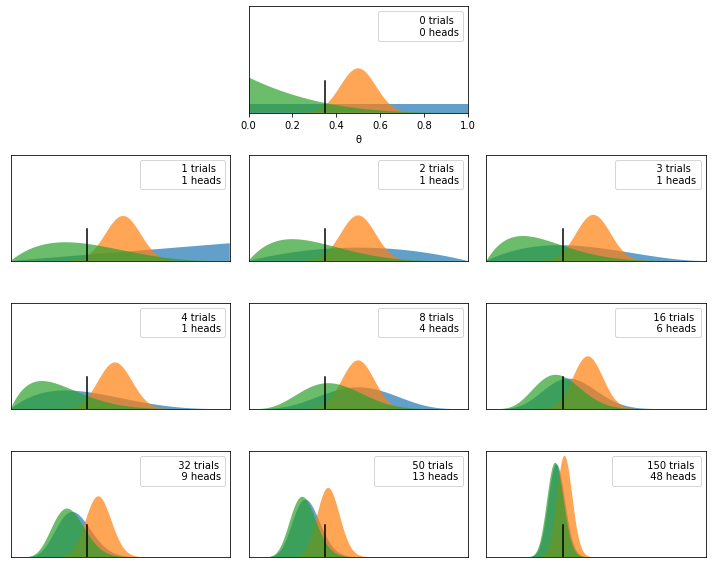

In [ ]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
      plt.subplot(4, 3, idx+3)
      plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()     



*   The uniform (blue) prior. This represent all the possible values for the bias being
equally probable a priori.
* The Gaussian-like (orange) prior is centered and concentrated around 0.5, so this
prior is compatible with information indicating that the coin has more or less
about the same chance of landing heads or tails. We could also say this prior is
compatible with the belief that most coins are fair. While belief is commonly used
in Bayesian discussions, we think is better to talk about models and parameters
that are informed by data.
* The skewed (green) prior puts the most weight on a tail-biased outcome.




In [ ]:
import arviz as az

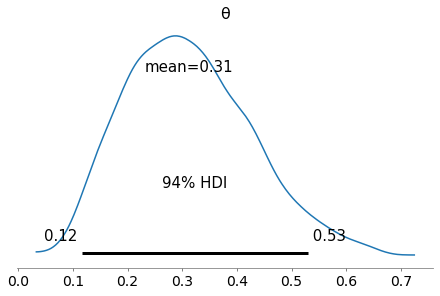

In [ ]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

In [ ]:
import pymc3 as pm

In [ ]:
data = np.array([0, 1, 1, 1, 1, 4, 6, 9, 13, 48])

In [ ]:
with pm.Model() as first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000)

SamplingError: ignored